In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("done....")

done....


In [2]:
df = pd.read_csv("/kaggle/input/air-quality-data-set/AirQuality.csv", delimiter=';')


In [3]:
df = df.replace({',': '.'}, regex=True)

In [4]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S')

In [5]:
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [6]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [7]:
df.set_index('Datetime', inplace=True)

In [8]:
df = df.apply(pd.to_numeric, errors='coerce')

In [9]:
# Drop rows with any NaN values
df = df.dropna()

In [10]:
stats = df.describe()
print(stats)

            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     257.433866    321.993552   126.940455    467.210125   456.938184   
min    -200

In [11]:
# Correlation analysis
correlation_matrix = df.corr()
print(correlation_matrix)

                 CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
CO(GT)         1.000000     0.041411  0.128351 -0.031378       0.029926   
PT08.S1(CO)    0.041411     1.000000  0.170007  0.852687       0.933102   
NMHC(GT)       0.128351     0.170007  1.000000  0.037323       0.110104   
C6H6(GT)      -0.031378     0.852687  0.037323  1.000000       0.767433   
PT08.S2(NMHC)  0.029926     0.933102  0.110104  0.767433       1.000000   
NOx(GT)        0.526451     0.277993 -0.004427 -0.001174       0.331272   
PT08.S3(NOx)  -0.089981     0.087019  0.048821  0.512193      -0.073667   
NO2(GT)        0.671127     0.154030  0.103307 -0.010992       0.176488   
PT08.S4(NO2)  -0.073724     0.845149  0.162680  0.774673       0.874782   
PT08.S5(O3)    0.080310     0.892434  0.101185  0.641334       0.909905   
T             -0.068939     0.754844 -0.000009  0.971375       0.669025   
RH            -0.048227     0.745375  0.008284  0.925062       0.585803   
AH            -0.045892  

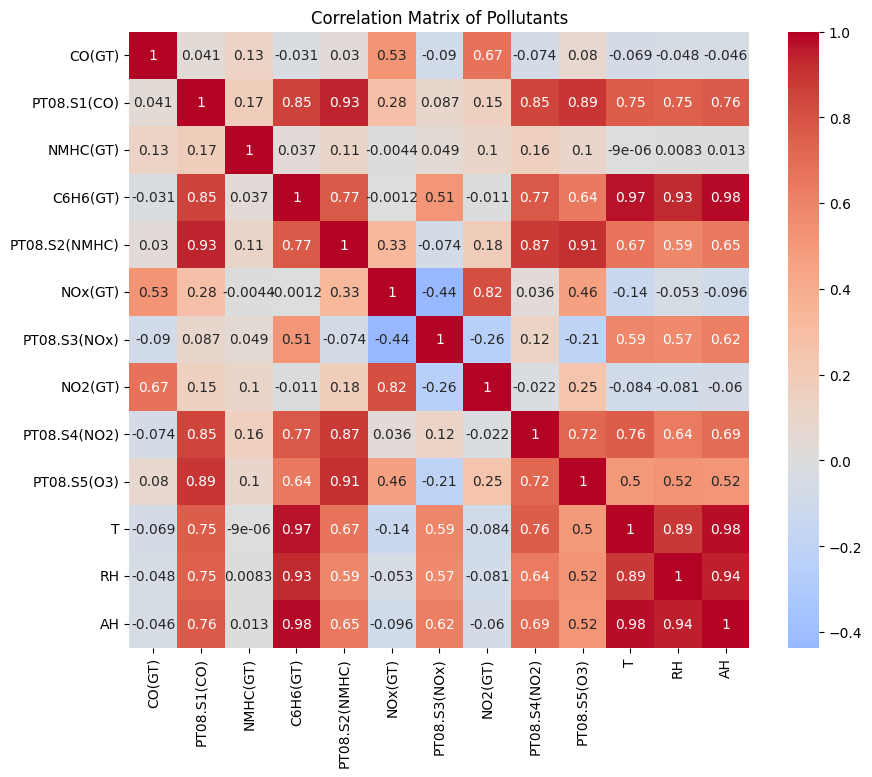

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Pollutants')
plt.show()

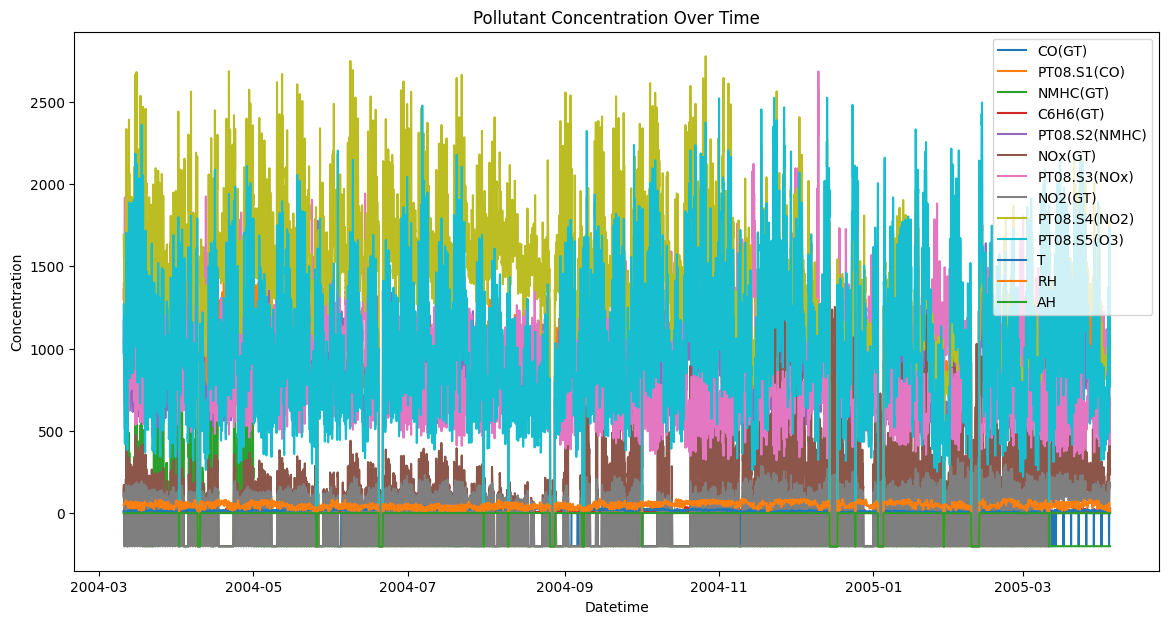

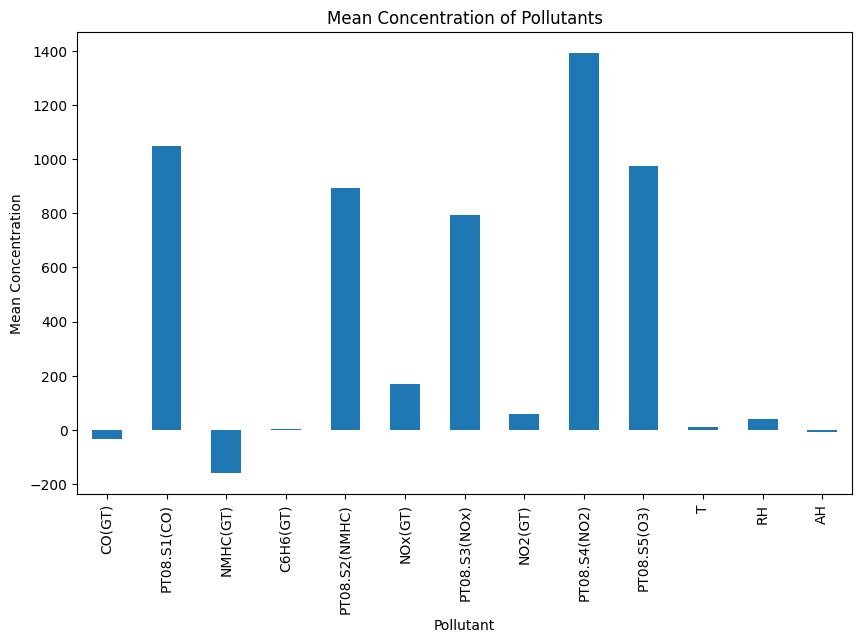

In [13]:
# Visualization of pollutant concentration over time
plt.figure(figsize=(14, 7))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)
plt.xlabel('Datetime')
plt.ylabel('Concentration')
plt.title('Pollutant Concentration Over Time')
plt.legend()
plt.show()

# Bar plot for mean values of pollutants
mean_values = df.mean()
mean_values.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Pollutant')
plt.ylabel('Mean Concentration')
plt.title('Mean Concentration of Pollutants')
plt.show()